# Clustering Analysis of volunteers
Curious to see what the volunteers motivations are and if I can group them into "selfish" and not selfish categories. I specifically used K Means clustering to group volunteers into two. groups and see what trends I could find. Non responses were coded as zero, essentially the person being survyed has no opinion/doesn't care.

The groups segment nicely, it

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
extra_path = r'Source Data/data/Extra/'
pbc_df = pd.read_csv(extra_path + "PBC End of Project Evaluation - 2015.csv", skiprows = 2, prefix="pbc_", header=None)
pbc_df.head()

,pbc_0,pbc_1,pbc_2,pbc_3,pbc_4,pbc_5,pbc_6,pbc_7,pbc_8,pbc_9,...,pbc_64,pbc_65,pbc_66,pbc_67,pbc_68,pbc_69,pbc_70,pbc_71,pbc_72,pbc_73
0,4229942890,73893194,9/30/2015 22:19,9/30/2015 22:36,73.170.60.119,cterdiman@gmail.com,Cynthia,Terdiman,Family Violence Law Center,San Francisco Bay Area,...,<br>4,<br>4,NaN,NaN,NaN,<br>4,<br>3,NaN,<br>3,NaN
1,4229564376,73893194,9/30/2015 14:13,9/30/2015 20:29,98.234.182.122,geri@thewebdom.com,Geraldine,Macomber,Family Violence Law Center,San Francisco Bay Area,...,<br>4,<br>4,Not at all likely<br>1,<br>2,Not at all likely<br>1,<br>2,NaN,NaN,Extremely likely<br>5,I joined Taproot to work with other profession...
2,4224127001,73893194,9/28/2015 18:37,9/28/2015 18:44,47.22.145.210,shanflan83@gmail.com,Shannon,Flannigan,Dance Theatre Etcetera,New York,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4222452342,73893194,9/28/2015 1:21,9/28/2015 2:10,96.225.97.193,robert.stjacques@gmail.com,Robert,St Jacques,Dance Theatre Etcetera,New York,...,NaN,NaN,NaN,NaN,<br>4,<br>4,<br>2,NaN,Not at all likely<br>1,NaN
4,4220299202,73320803,9/25/2015 20:52,9/25/2015 20:59,104.129.192.60,wryanberger@gmail.com,Ryan,Berger,Big Up Kidz,Los Angeles,...,Extremely likely<br>5,Extremely likely<br>5,Extremely likely<br>5,Extremely likely<br>5,<br>4,Extremely likely<br>5,<br>2,NaN,Extremely likely<br>5,NaN


In [3]:
#Filter to the columns I want
pbc_df = pbc_df[["pbc_20", "pbc_21", "pbc_22", "pbc_23", "pbc_24", "pbc_25", "pbc_26", "pbc_27", "pbc_28", "pbc_29", "pbc_30", "pbc_31"]]
pbc_df.head()

,pbc_20,pbc_21,pbc_22,pbc_23,pbc_24,pbc_25,pbc_26,pbc_27,pbc_28,pbc_29,pbc_30,pbc_31
0,<br>4,<br>4,<br>4,NaN,<br>4,<br>4,<br>4,NaN,NaN,NaN,NaN,NaN
1,<br>4,<br>2,NaN,NaN,<br>4,<br>4,NaN,NaN,<br>2,NaN,NaN,NaN
2,<br>3,<br>2,<br>2,<br>2,<br>2,<br>2,<br>2,Not achieved <br>1,<br>3,<br>3,<br>2,<br>2
3,<br>4,<br>4,<br>4,<br>4,<br>4,<br>4,<br>4,<br>4,<br>4,<br>4,<br>4,<br>4
4,<br>4,NaN,<br>2,NaN,NaN,<br>2,<br>4,<br>3,Achieved greatly<br>5,NaN,NaN,NaN


In [4]:
#Convert cals to numbers
for col in pbc_df.columns:
    pbc_df[col] = pbc_df[col].str.extract("(\d)").fillna(0).astype(int)

#Replace NAN with zeroes
pbc_df.head()

,pbc_20,pbc_21,pbc_22,pbc_23,pbc_24,pbc_25,pbc_26,pbc_27,pbc_28,pbc_29,pbc_30,pbc_31
0,4,4,4,0,4,4,4,0,0,0,0,0
1,4,2,0,0,4,4,0,0,2,0,0,0
2,3,2,2,2,2,2,2,1,3,3,2,2
3,4,4,4,4,4,4,4,4,4,4,4,4
4,4,0,2,0,0,2,4,3,5,0,0,0


In [5]:
#pbc_df.drop("group", axis =1)
#Time to do K Means clustering
from sklearn.cluster import KMeans
clf = KMeans(n_clusters = 2)
p = clf.fit_predict(pbc_df.values)


In [12]:
#Add group to finished df
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pbc_df.dtypes


pbc_20    int32
pbc_21    int32
pbc_22    int32
pbc_23    int32
pbc_24    int32
pbc_25    int32
pbc_26    int32
pbc_27    int32
pbc_28    int32
pbc_29    int32
pbc_30    int32
pbc_31    int32
dtype: object

In [36]:
#Rename Columns
col_names = ["do pro bono",
"support the nonprofit \n organizations mission",
"help my community",
"learn more about the \n nonprofit sector",
"find a way to give back, \n beyond financial support",
"skills to give back, \n rather than \n standard volunteering",
"support Taproot",
"expand my social network",
"expand my professional network",
"gain professional experience",
"keep my skills up-to-date \n while looking for work",
"a new challenge"]

pbc_df.columns = col_names

In [37]:
#Add Random Noise
noise = np.random.normal(0, .3, pbc_df.shape)
pbc_df_noise = pbc_df + noise
pbc_df_noise["group"] = pd.Series(p).astype("float")

C:\Miniconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


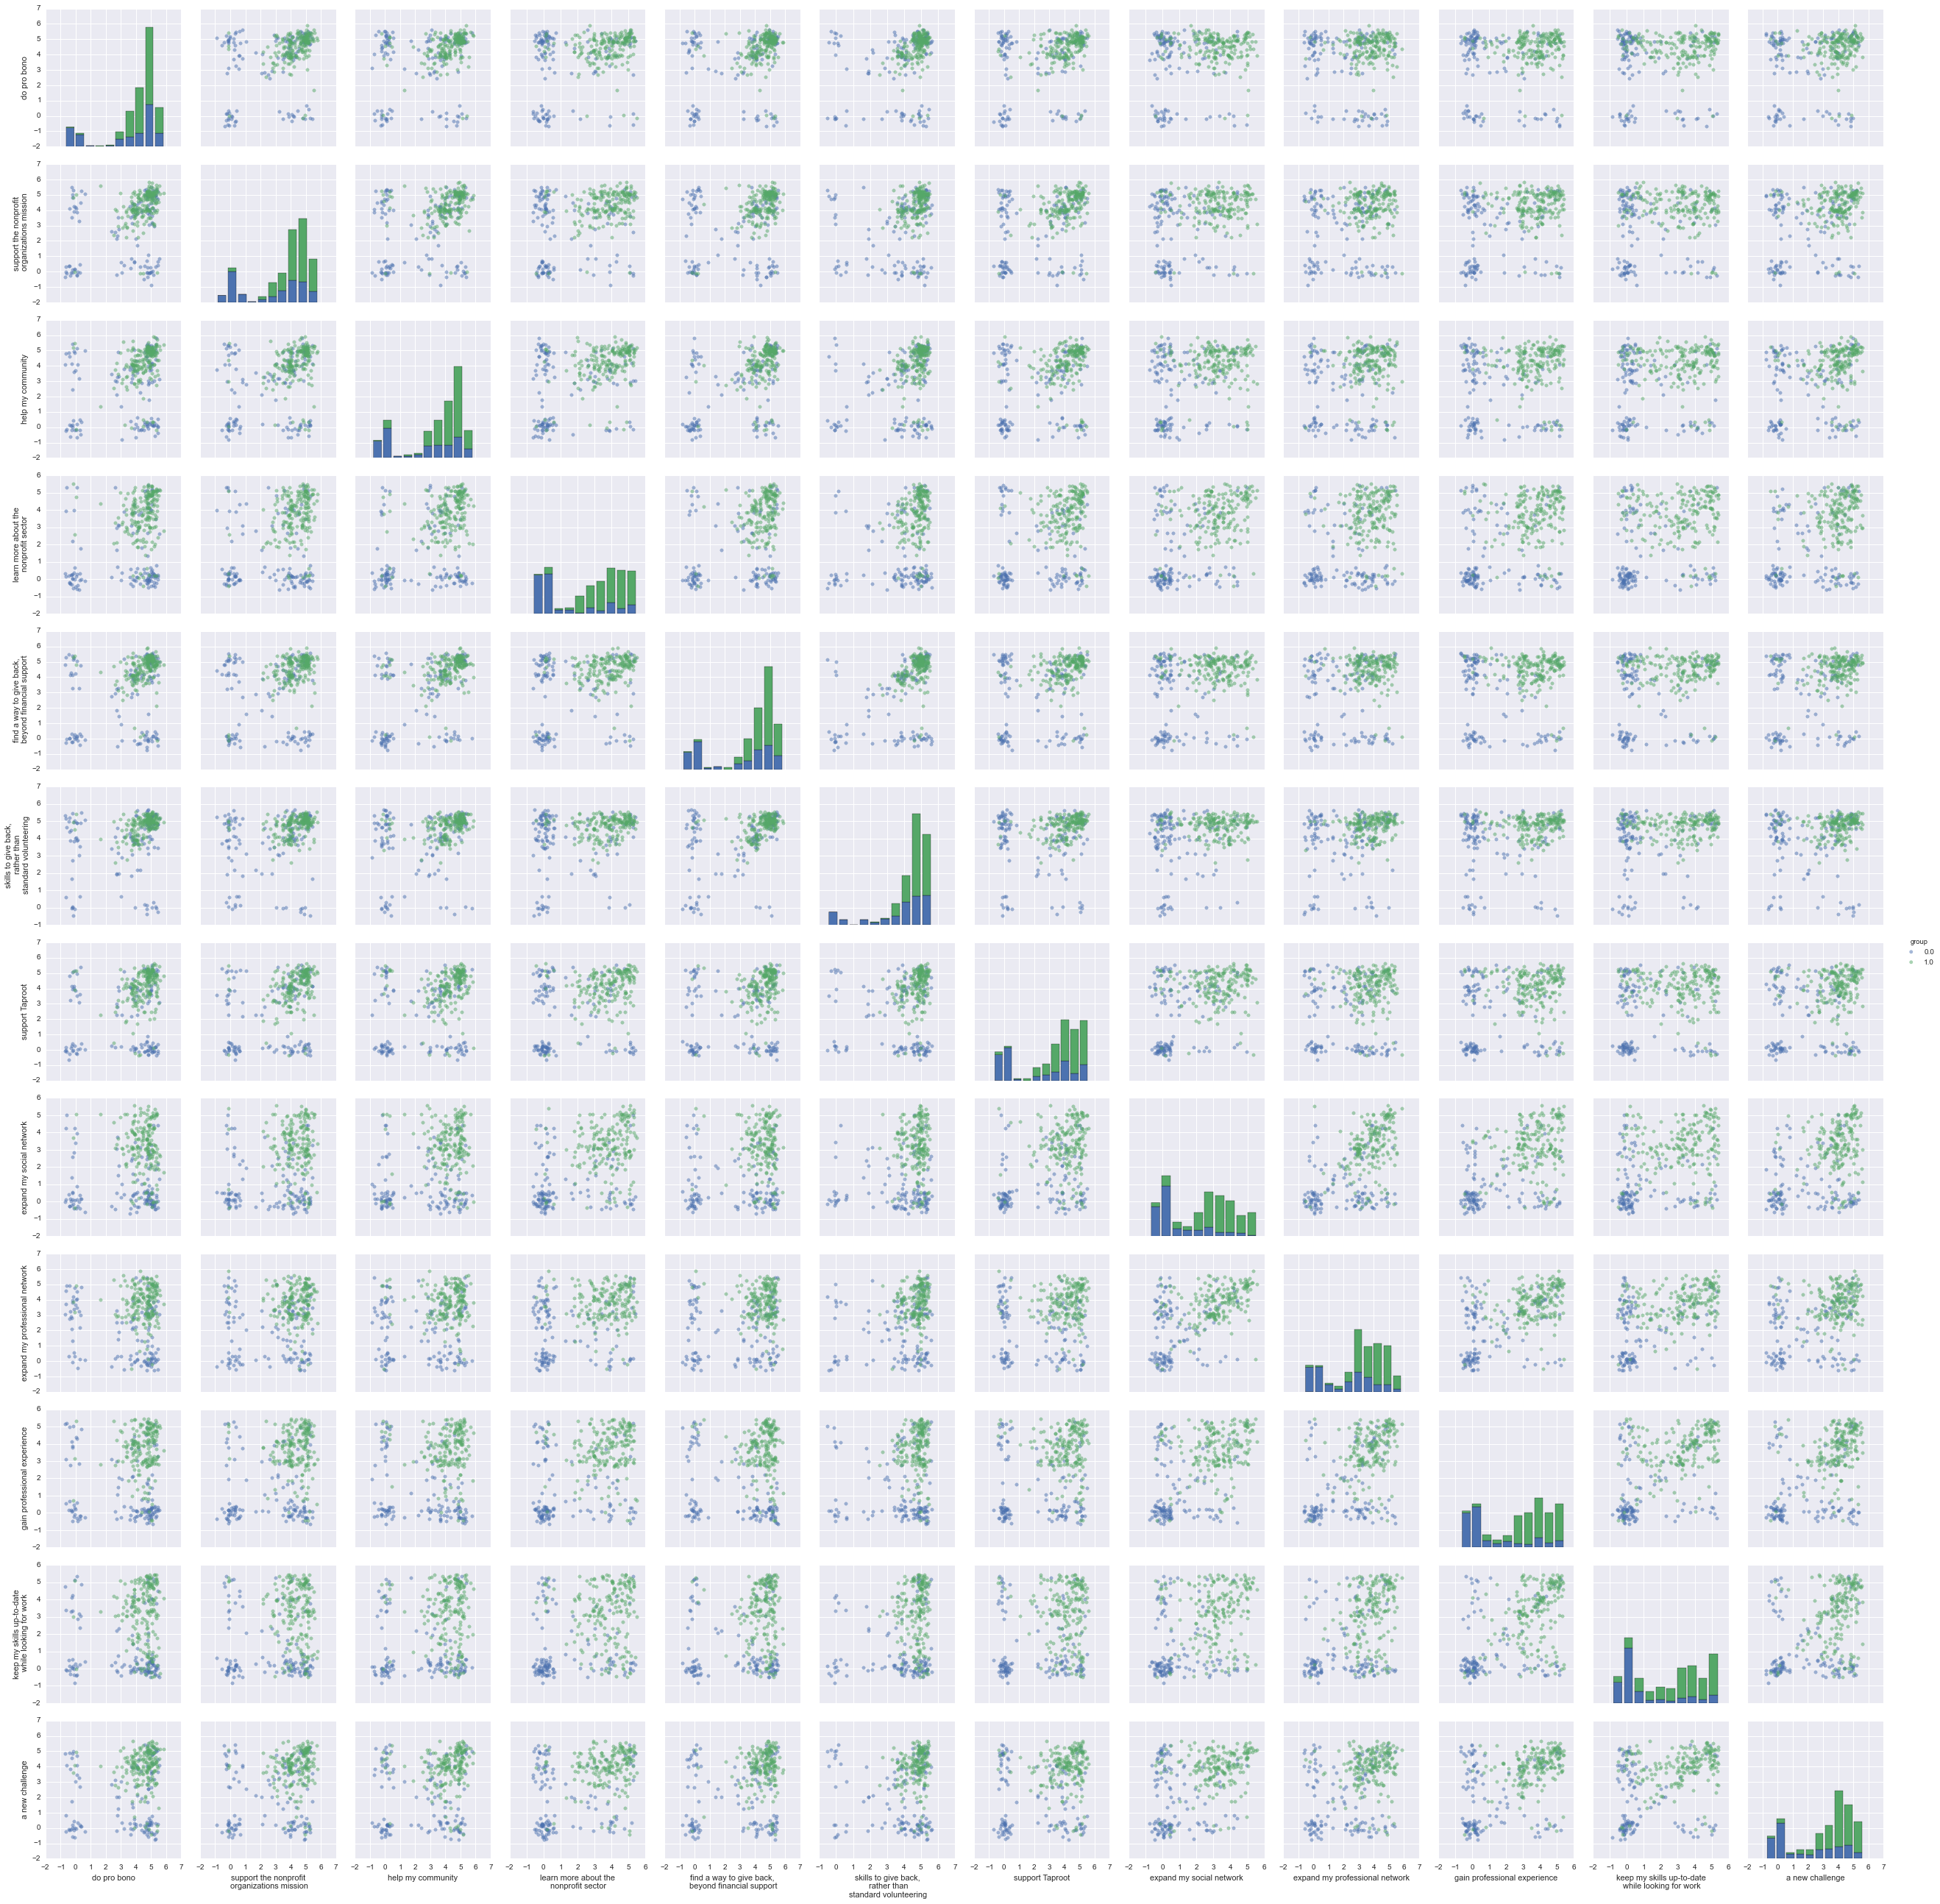

In [38]:
sns.pairplot(pbc_df_noise, vars = col_names, size = 3, hue = "group", plot_kws=dict(alpha = .5))
plt.savefig("Volunteer_Motivation_2015.svg")